## Observations and Insights 

In [1]:
# %matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [3]:
# take a look at both dfs to see where to merge
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
merged_df=pd.merge(mouse_metadata, study_results)

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of data values.
merged_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [7]:
# Checking the number of total mice.
tot_mice=len(merged_df.loc[:, 'Mouse ID'].unique())
tot_mice

249

In [8]:
merged_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [9]:
# Find duplicated Mouse IDs
duplicated_id=merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID']
print(duplicated_id)

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object


In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
filter_1=merged_df.loc[:, 'Mouse ID']== 'g989'

dropped_data_df=merged_df.loc[filter_1, :]
dropped_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [11]:
# Create a clean dataframe by only including from the original mice whose id does not equal g989
filter_2=merged_df.loc[:, 'Mouse ID']!='g989'
merged_df_clean=merged_df.loc[filter_2, :]
merged_df_clean.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [12]:
merged_df_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
# Checking the number of mice in the clean DataFrame. 
tot_mice_clean=merged_df_clean.loc[:, 'Mouse ID'].nunique()
print(tot_mice_clean)

248


## Summary Statistics

In [14]:
# Get initial information on clean dataframe
merged_df_clean.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,12.757979,25.660106,19.606383,50.435293,1.025000
std,7.181998,3.935064,14.094238,8.914197,1.139971
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.933454,1.000000
75%,19.250000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [15]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_df=merged_df_clean.groupby('Drug Regimen')

tv_mean=drug_df['Tumor Volume (mm3)'].mean()
tv_median=drug_df['Tumor Volume (mm3)'].median()
tv_var=drug_df['Tumor Volume (mm3)'].var()
tv_std=drug_df['Tumor Volume (mm3)'].std()
tv_sem=drug_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
new_columns={
    "Mean Tumor Volume (mm3)": tv_mean,
    "Median Tumor Volume (mm3)": tv_median,
    "Variance": tv_var,
    "Standard Deviation": tv_std,
    "Standard Error of Mean": tv_sem
}

drug_summary_df=pd.DataFrame(new_columns)

drug_summary_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_df=merged_df_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

agg_summary_df

new_columns={
    "mean":"Mean Tumor Volume (mm3)",
    "median": "Median Tumor Volume (mm3)",
    "var": "Variance",
    "std": "Standard Deviation",
    "sem": "Standard Error of Mean"
}

# Rename columns
agg_summary_df.rename(columns=new_columns)

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

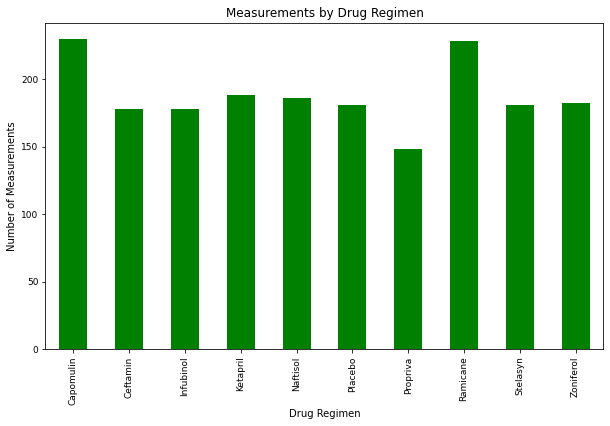

<Figure size 432x288 with 0 Axes>

In [17]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Pull a series representing number of measurements by drug regimen
drug_count=drug_df.count()['Mouse ID']

# Plot using pandas
drug_count.plot(kind='bar', figsize=(10, 6), ylabel='Number of Measurements', title='Measurements by Drug Regimen', color="green",fontsize=9)
plt.show()
plt.tight_layout()

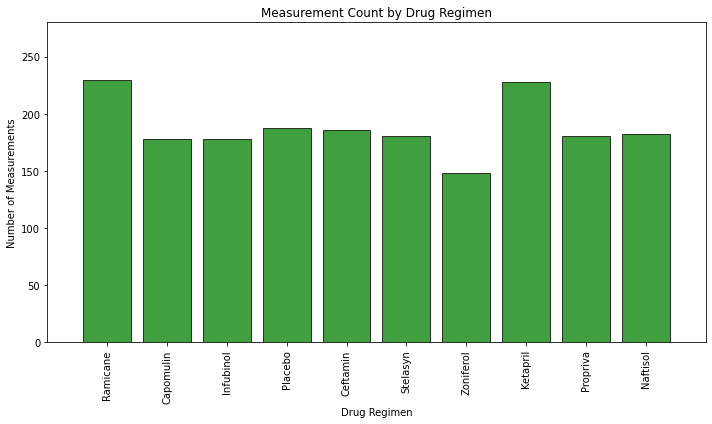

In [18]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis=np.arange(len(merged_df_clean.loc[:, "Drug Regimen"].unique()))
y_axis=drug_count
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10, 6))
plt.bar(x_axis, y_axis, color='g', edgecolor='k', alpha=0.75, align='center')
plt.xticks(tick_locations, merged_df_clean['Drug Regimen'].unique(), rotation='vertical')
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(drug_count)+50)
plt.title('Measurement Count by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.tight_layout()
plt.show()

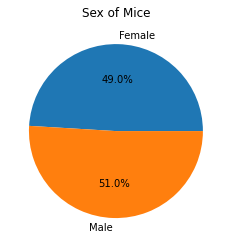

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_count_df=merged_df_clean[['Mouse ID', 'Sex']].groupby('Sex').count()

new_columns={
    "Mouse ID":"Number of Mice"
}

sex_count_df_renamed=sex_count_df.rename(columns=new_columns)

# Create pie chart using df above
sex_count_df_renamed.plot(y="Number of Mice", kind='pie', title="Sex of Mice", autopct='%1.1f%%', legend=False)
plt.ylabel("")
plt.show()

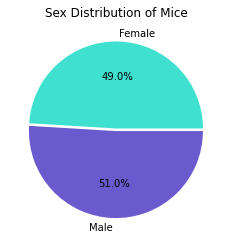

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = sex_count_df_renamed.index
sizes = sex_count_df_renamed['Number of Mice']
colors = ['turquoise', 'slateblue']
explode = [0.03, 0]
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title('Sex Distribution of Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# Pull a reference df that you will later use for merging
mouse_drug_df=merged_df_clean.loc[:, ['Mouse ID', 'Drug Regimen']].drop_duplicates()

In [24]:
# Find max timepoint to find end tumor values, merge with original df

mouse_last_measure_df=merged_df_clean.loc[:, ['Mouse ID', 'Timepoint']].groupby('Mouse ID').max()


# Merge df with max timepoint with original df
mouse_last_measure_df_vol=pd.merge(mouse_last_measure_df, merged_df_clean[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']], left_index=True, right_on='Mouse ID')


# Create a filter to only show the rows where timepoint y = final timepoint, and fill in tumor volume
filter_df=mouse_last_measure_df_vol['Timepoint_x']==mouse_last_measure_df_vol['Timepoint_y']
mouse_last_measure_df_with_volume=mouse_last_measure_df_vol[filter_df][['Mouse ID', 'Timepoint_y', 'Tumor Volume (mm3)']]


mouse_final_tumor_df=pd.merge(mouse_last_measure_df_with_volume, mouse_drug_df)


mouse_final_tumor_df.head()

,Mouse ID,Timepoint_y,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a262,45,70.717621,Placebo
3,a275,45,62.999356,Ceftamin
4,a366,30,63.440686,Stelasyn


In [ ]:
#Loop through df to create lists of tumor volumes for each drug,
# calculate quartiles and outliers for each treatment type using the lists

treatment_list= ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_list= []

for each_drug in treatment_list:
    final_tumor_volume=mouse_final_tumor_df.loc[mouse_final_tumor_df['Drug Regimen']==each_drug, 'Tumor Volume (mm3)']
    
    tumor_vol_list.append(final_tumor_volume)
    
    
    quartiles = final_tumor_volume.quantile([.25, .5, .75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    lower_bound = lower_q - (1.5*iqr)
    upper_bound = upper_q + (1.5*iqr)
    
    print(f"{each_drug}'s potential outliers: {final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]}")
    print()



In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

treatment_list= ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tick_locations = [1, 2, 3, 4]
outliers = dict(markerfacecolor='blue',markersize=7)


fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes of Mice')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_vol_list, flierprops=outliers)
plt.xticks(tick_locations, labels=treatment_list)
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# using original df, pull time and tumor volume for one mouse id that also is capomulin
merged_df_clean.head()
capomulin_filter=merged_df_clean.loc[:, 'Drug Regimen']=='Capomulin'

cap_mice=merged_df_clean.loc[capomulin_filter, 'Mouse ID']
cap_mice.head(10)

# mouse s185 is on capomulin.
# pull time and tumor volume for 

cap_mouse_filter=merged_df_clean.loc[:, 'Mouse ID']=='s185'
cap_mouse_df=merged_df_clean.loc[cap_mouse_filter,]
cap_mouse_df

In [ ]:
# generate line plot of tumor volume vs time point for mouse s185
# y axis = tumor volume
cap_mouse_tumor_volume=cap_mouse_df['Tumor Volume (mm3)']
# x axis = timepoint
cap_timepoint=cap_mouse_df['Timepoint']

plt.plot(cap_timepoint, cap_mouse_tumor_volume, marker='^', color='purple')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.title('Tumor progression for mouse s185 on Capomulin')
plt.show()

## Correlation and Regression

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_filter_1=merged_df_clean.loc[:, 'Drug Regimen']=='Capomulin'
capomulin_df=merged_df_clean.loc[capomulin_filter_1, :]

average_tumor_volume=capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mouse_weight=capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()



plt.scatter(x=mouse_weight, y=average_tumor_volume, marker='o', facecolors='blue', edgecolors='black', alpha=0.50)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Weight of Mouse treated by Capomulin')
plt.xlim(14, 27)
plt.ylim(33, 47)


# Calculate correlation coefficient and linear regression model
x_values = mouse_weight
y_values = average_tumor_volume

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
correlation = sts.pearsonr(x_values, y_values) 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20,36),fontsize=10,color="red")

print(f'The correlation between both factors is {round(correlation[0],2)}')
plt.show()